In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylops

from scipy import linalg as la
from scipy import sparse

from trips.io import build_x_true
from trips.operators import gaussian_blur_operator, first_derivative_operator
from trips.solvers.gks import GKS

### construct a true image

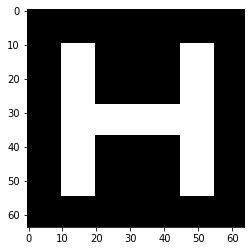

In [2]:
x_true = build_x_true().reshape(-1,1)

plt.imshow(x_true.reshape(64,64), cmap='Greys_r')

### apply an operator

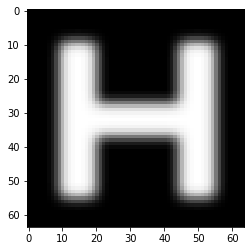

In [3]:
blur_operator = gaussian_blur_operator([9,9],2,64,64)

b_true = blur_operator @ x_true

plt.imshow( b_true.reshape(64,64), cmap='Greys_r')

### contaminate with noise

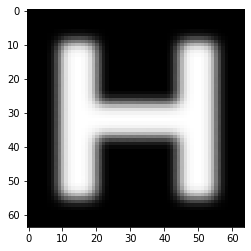

In [4]:
noise_level = 0.001
noise = np.random.randn(64*64)
e = noise_level * np.linalg.norm(b_true) / np.linalg.norm(noise) * noise
e = e.reshape(-1,1)
b = b_true + e
plt.imshow( b.reshape(64,64), cmap='Greys_r')

In [5]:
b_true.shape

(4096, 1)

In [6]:
e.shape

(4096, 1)

In [7]:
b.shape

(4096, 1)

### construct regularization operators

In [8]:
I = pylops.Identity(4096) # identity operator
D = first_derivative_operator(n=4096) # first derivative operator
D2 = D @ D # second derivative operator

### run GKS with GCV

In [9]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = GKS(blur_operator, b, D, regparam='gcv', projection_dim=3, n_iter=80, x_true=x_true, tol=10**(-16))

3


running GKS...: 100%|██████████| 80/80 [00:15<00:00,  5.20it/s]


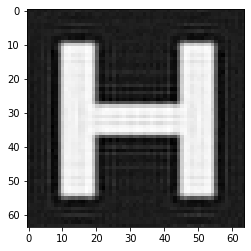

In [10]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

### convergence

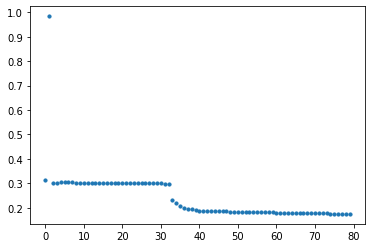

In [11]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

### history of solutions

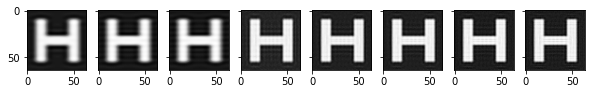

In [12]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

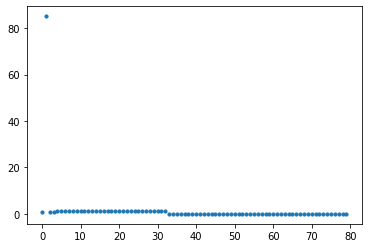

In [13]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)

In [14]:
rre_history[-1]

0.17462844923271106

### run GKS with DP

In [15]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = GKS(blur_operator, b, D, projection_dim=3, n_iter=80, regparam='dp', x_true=x_true, eta=1.01, delta=la.norm(e), tol=10**(-16))

3


running GKS...:  34%|███▍      | 27/80 [00:00<00:01, 44.31it/s]c:\Users\conno\repos\multiparameter_package\virt\lib\site-packages\trips\parameter_selection\discrepancy_principle.py:53: RuntimeWarning: divide by zero encountered in true_divide
  beta_new = beta - f/f_prime
c:\Users\conno\repos\multiparameter_package\virt\lib\site-packages\trips\parameter_selection\discrepancy_principle.py:56: RuntimeWarning: invalid value encountered in subtract
  if abs(beta_new - beta) < 10**(-7)* beta:
running GKS...:  46%|████▋     | 37/80 [00:01<00:01, 28.92it/s]c:\Users\conno\repos\multiparameter_package\virt\lib\site-packages\trips\parameter_selection\discrepancy_principle.py:53: RuntimeWarning: overflow encountered in true_divide
  beta_new = beta - f/f_prime
running GKS...: 100%|██████████| 80/80 [00:05<00:00, 14.89it/s]


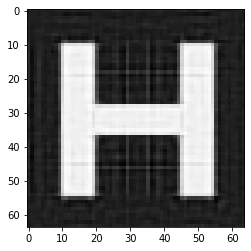

In [16]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

### convergence

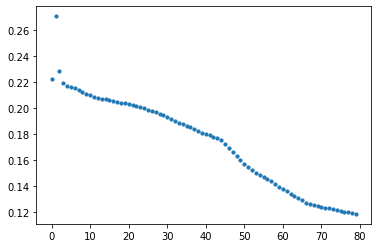

In [17]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

### history of solutions

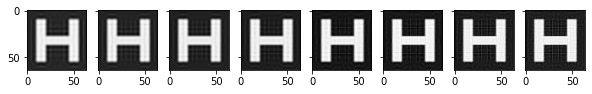

In [18]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

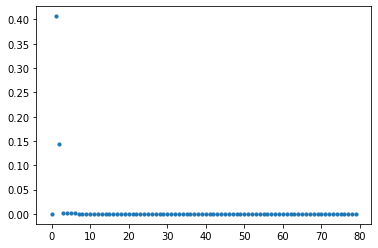

In [19]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)

### run GKS with a sequence of parameter values

In [20]:
regvals = [0.001*(0.5**(x)) for x in range(0,80)]

In [21]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = GKS(blur_operator, b, D, regparam=regvals, projection_dim=3, n_iter=80, x_true=x_true, tol=10**(-16))

3


running GKS...: 100%|██████████| 80/80 [00:03<00:00, 22.65it/s] 


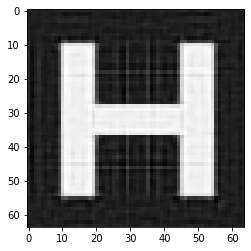

In [22]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

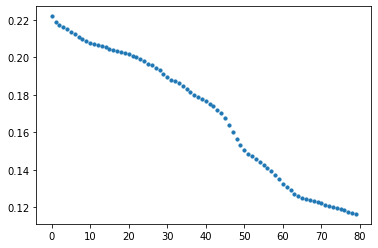

In [23]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

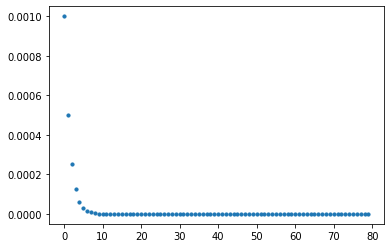

In [24]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)